##### Exploratory Data Analysis for soundable-ML pipeline using using Agapornis-swindernianus (bird) vocalizations to test which SciPy / Librosa methods give the best signal-to-noise ratio in a real-world environment.

In [70]:
# audio sample is available here: https://xeno-canto.org/824126
# name: XC824126-Agapornis-swindernianus.mp3
# link: 



In [77]:
# read in audio sample
import wave
audio_sample = wave.open('XC824126-Agapornis-swindernianus.wav')

# check audio parameters
sample_rate = audio_sample.getframerate()
number_channels = audio_sample.getnchannels()
number_samples = audio_sample.getnframes()
duration = number_samples / sample_rate

print(' sample-rate:',  sample_rate, '\n',
      'number-channels:', number_channels, '\n',
      'number-samples:', number_samples, '\n',
      'duration:', duration)

# generate array from numpy
import numpy as np
sig_wav = audio_sample.readframes(audio_sample.getnframes())
sig_arr = np.frombuffer(sig_wav, dtype=np.int16)

# get right channel
r_chan = sig_arr[1::2]

# creat ts array
tim_stp = np.linspace(0, duration, num=number_samples)

 sample-rate: 44100 
 number-channels: 2 
 number_samples: 715817 
 duration: 16.231678004535148


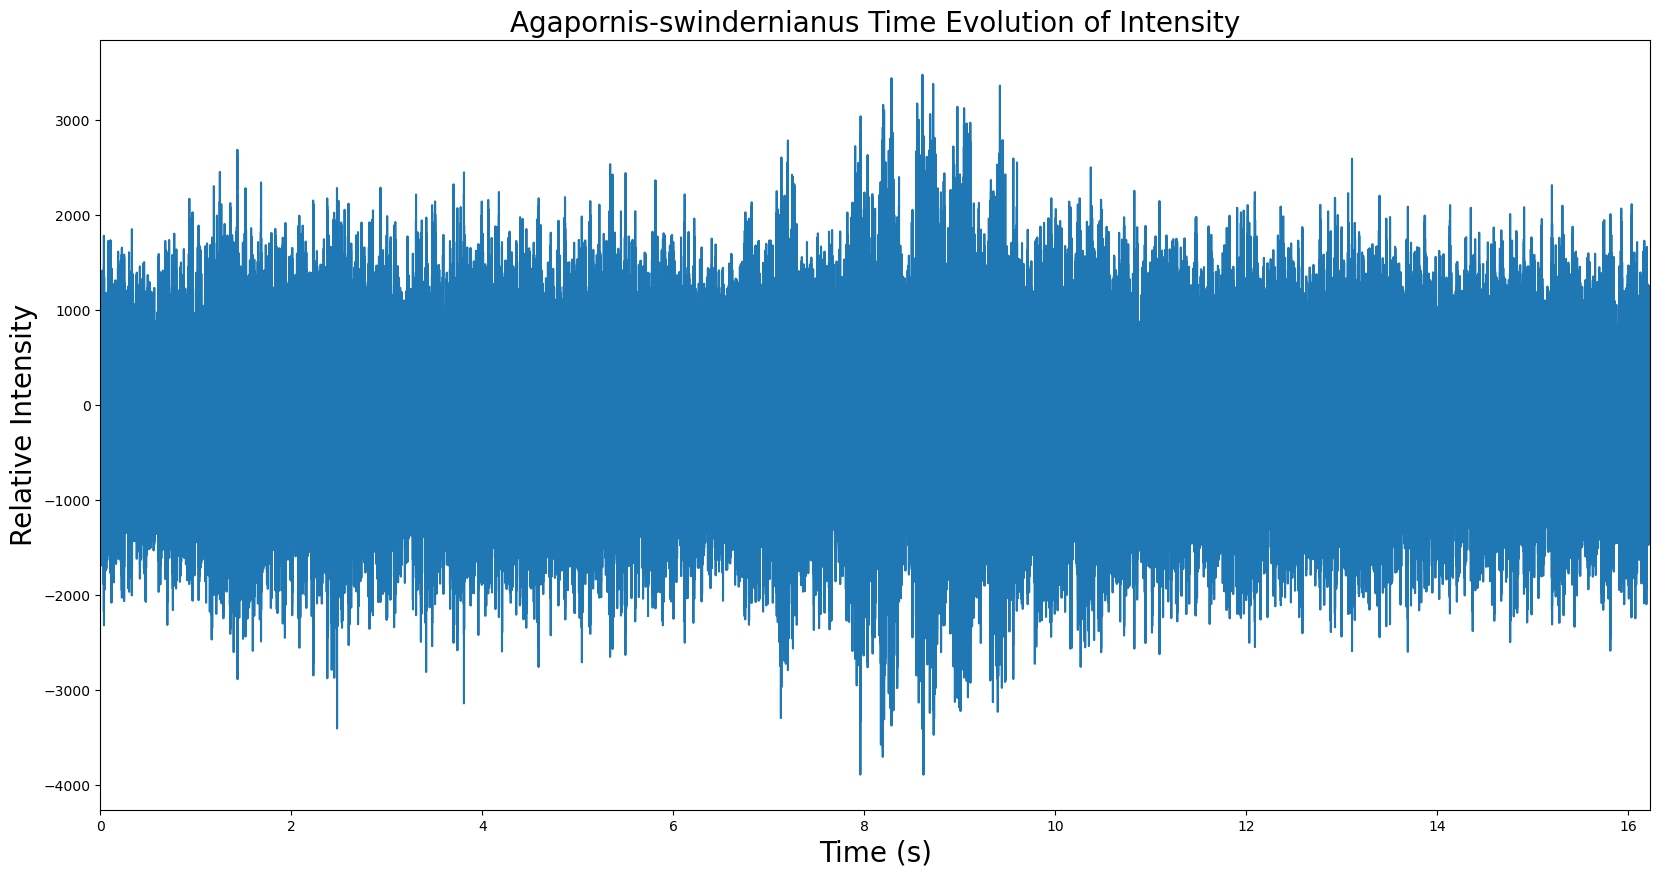

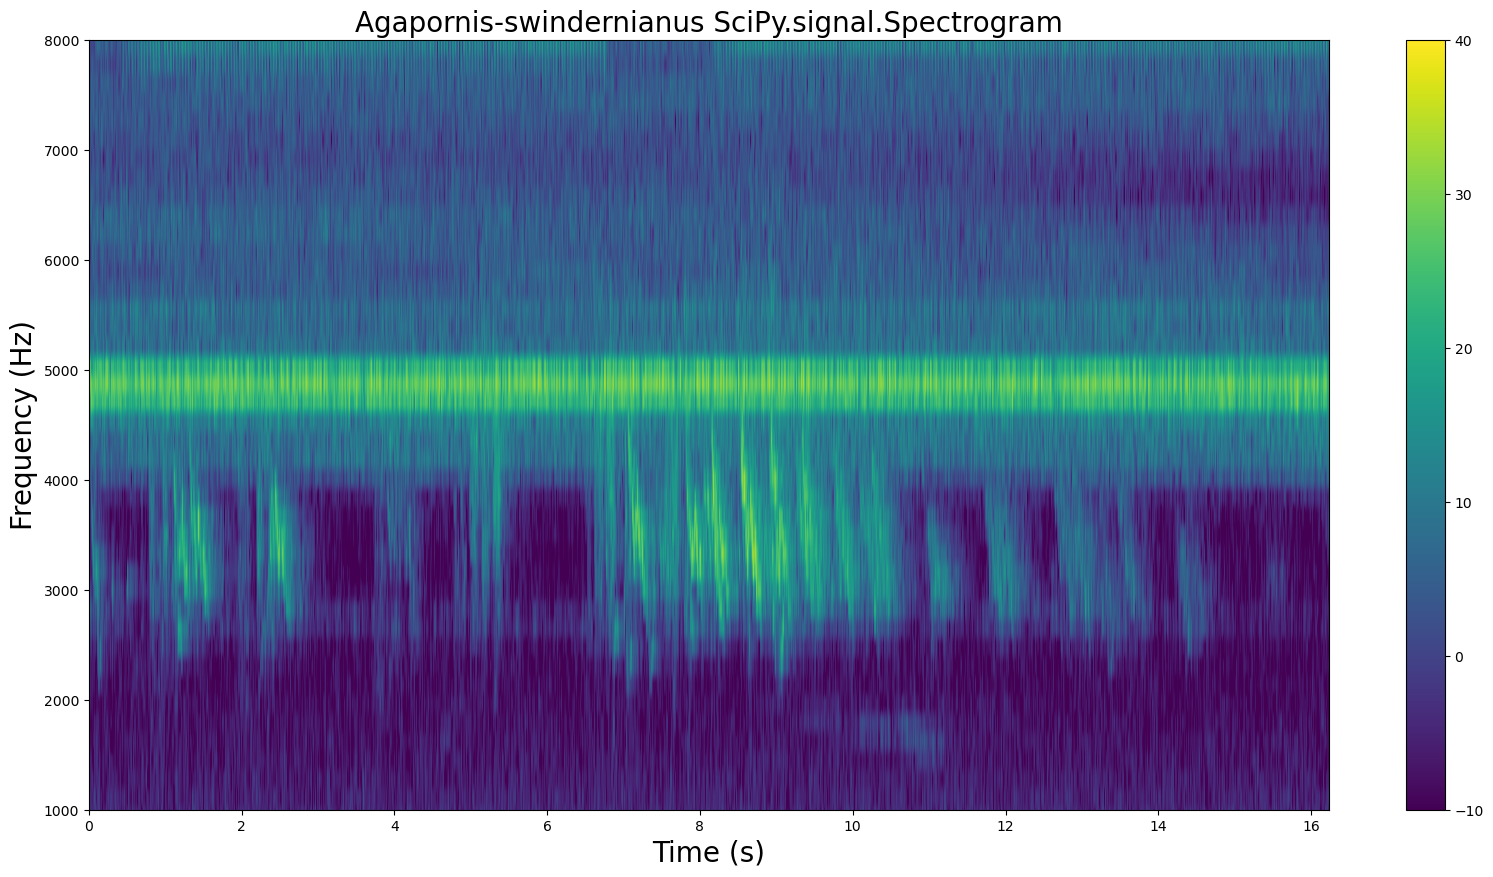

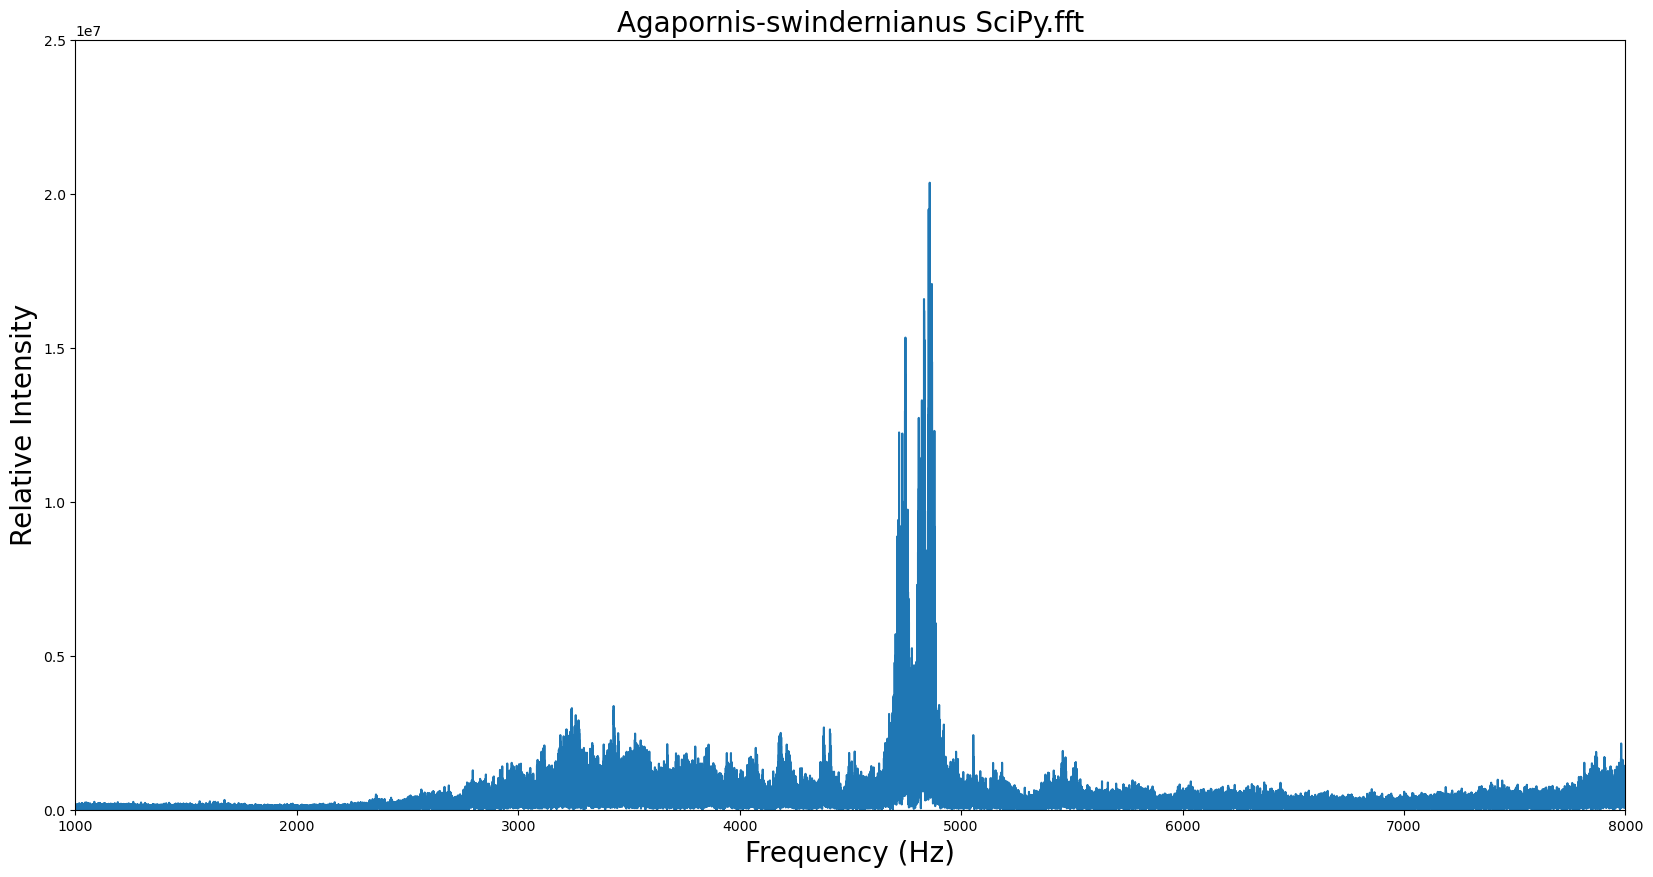

In [72]:
# plot right channel signal as function of time
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(tim_stp, r_chan)
plt.title('Agapornis-swindernianus Time Evolution of Intensity',
         fontsize=20)
plt.ylabel('Relative Intensity',
          fontsize=20)
plt.xlabel('Time (s)',
          fontsize=20)
plt.xlim(0, duration)
plt.show()

# plot spectrograph for comparison with FFT
plt.figure(figsize=(20,10))
plt.specgram(r_chan, Fs=sample_rate, vmin=-10, vmax=40)
plt.title('Agapornis-swindernianus SciPy.signal.Spectrogram',
         fontsize=20)
plt.ylabel('Frequency (Hz)',
          fontsize=20)
plt.xlabel('Time (s)',
          fontsize=20)
plt.ylim(1000,8000)
plt.xlim(0, duration)
plt.colorbar()
plt.show()

# plot FFT 
import scipy
from scipy.fft import fft, rfft, fftfreq, rfftfreq
yr = rfft(r_chan)
xr = rfftfreq(number_samples, 1/sample_rate)
plt.figure(figsize=(20,10))
plt.plot(xr, np.abs(yr))
plt.title('Agapornis-swindernianus SciPy.fft',
          fontsize=20)
plt.ylabel('Relative Intensity',
          fontsize=20)
plt.xlabel('Frequency (Hz)',
          fontsize=20)
plt.ylim(0, 0.025e9)
plt.xlim(1000, 8000)
plt.show()

##### Main vocalization is around 2.5-4kHz with relatively narrow band of white-noise around ~5kHz.

In [73]:
# need to expand frequency region between 2-6 kHz
# rewrite scipy.signal.spectrogram() or use librosa??